In [2]:
from Benchmark import Benchmark
import matplotlib.pyplot as plt

In [3]:
MPI_strong = Benchmark("output/MPI_strong.csv")
MPI_weak = Benchmark("output/MPI_weak.csv")
OpenMP_strong = Benchmark("output/OpenMP_strong.csv")
OpenMP_weak = Benchmark("output/OpenMP_weak.csv")

In [4]:
def amhdal(N, P):
    return 1 / ((1 - P) + (P / N))

S = MPI_strong.get_time(2) / MPI_strong.get_time(4)
p_MPI_strong = -3/2 * (1/S - 1) # one process is master

S = OpenMP_strong.get_time(2) / OpenMP_strong.get_time(4)
p_OpenMP_strong = 4 * (OpenMP_strong.get_time(2) - OpenMP_strong.get_time(4)) / (3*OpenMP_strong.get_time(2) - 2*OpenMP_strong.get_time(4))

print("MPI strong scaling: {:.2f}".format(p_MPI_strong))
print("OpenMP strong scaling: {:.2f}".format(p_OpenMP_strong))

MPI strong scaling: 0.94
OpenMP strong scaling: 0.88


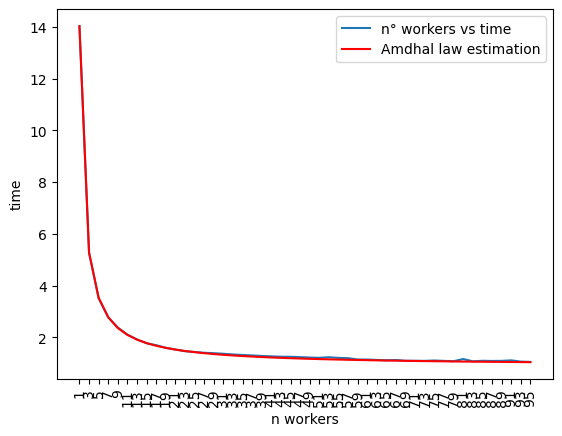

In [5]:
np_values = MPI_strong.df['np']
nw_values = [np_value - 1 for np_value in np_values]    

plt.plot(nw_values, MPI_strong.df['time'], label='n° workers vs time')
plt.xticks(nw_values, rotation='vertical')


y_values = [MPI_strong.get_time(2)/amhdal(nw, p_MPI_strong) for nw in nw_values]

plt.plot(nw_values, y_values, color='red', label='Amdhal law estimation')

# Add labels and legend
plt.xlabel('n workers')
plt.ylabel('time')
plt.legend()

# Show the plot
plt.show()

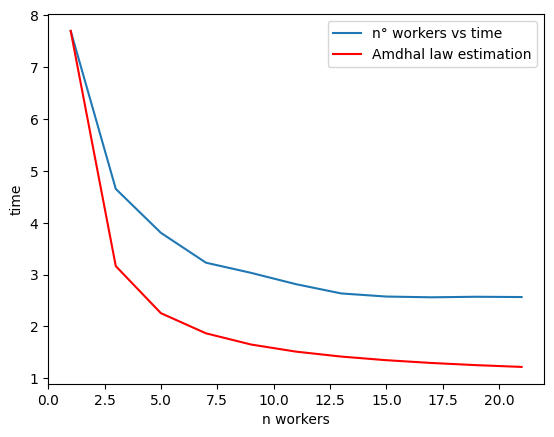

In [6]:
np_values = OpenMP_strong.df['nt']
nw_values = [np_value - 1 for np_value in np_values]    

plt.plot(nw_values, OpenMP_strong.df['time'], label='n° workers vs time')


y_values = [OpenMP_strong.get_time(2)/amhdal(nw, p_OpenMP_strong) for nw in nw_values]

plt.plot(nw_values, y_values, color='red', label='Amdhal law estimation')

# Add labels and legend
plt.xlabel('n workers')
plt.ylabel('time')
plt.legend()

# Show the plot
plt.show()

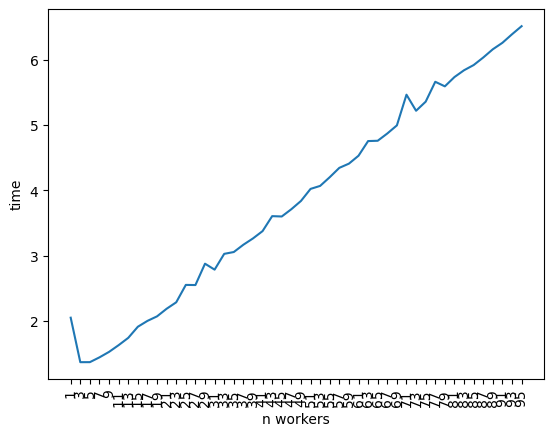

In [13]:
# plot weak scaling, np vs time
nw_values = [np_value - 1 for np_value in MPI_weak.df['np']]
plt.plot(nw_values, MPI_weak.df['time'], label='MPI weak scaling')
# vertical ticks
plt.xticks(nw_values, rotation='vertical')
plt.xlabel('n workers')
plt.ylabel('time')
plt.show()

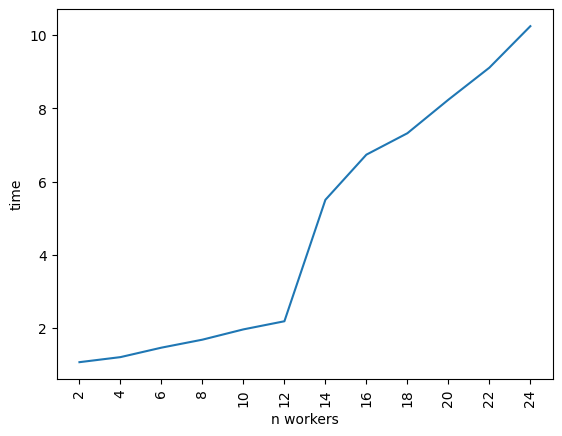

In [14]:
plt.plot(OpenMP_weak.df['nt'], OpenMP_weak.df['time'], label='n° threads vs time')
plt.xticks(OpenMP_weak.df['nt'], rotation='vertical')
plt.xlabel('n workers')
plt.ylabel('time')
plt.show()